In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


#1. Linear Regression (small dataset)

In [2]:
dicData ={'hours' : [2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8],
'scores' : [21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]}

In [3]:
data = pd.DataFrame(dicData)

In [4]:
data.head()

hours  scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hours   25 non-null     float64
 1   scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

hours     scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


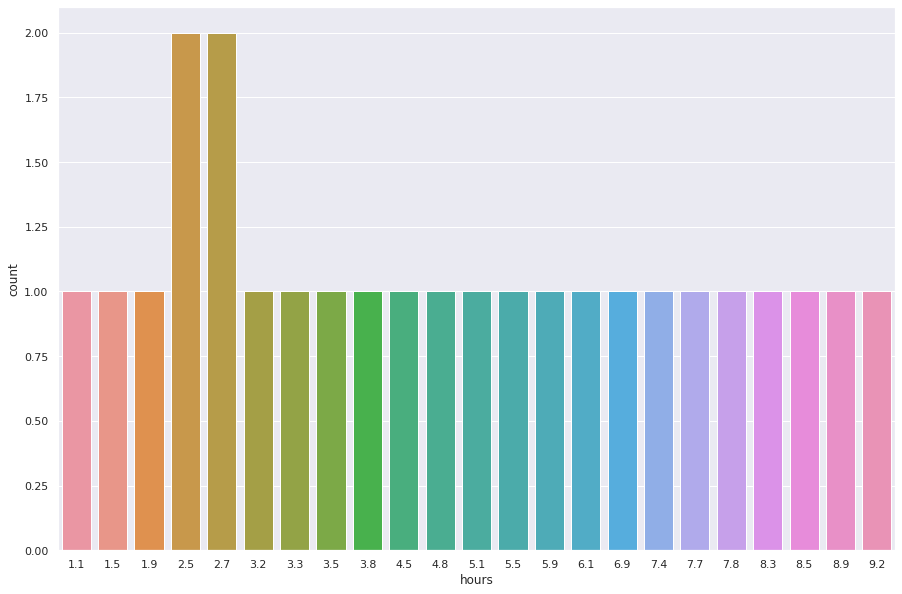

In [180]:
sns.countplot('hours',data=data)
sns.set(rc={'figure.figsize':(15,10)})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


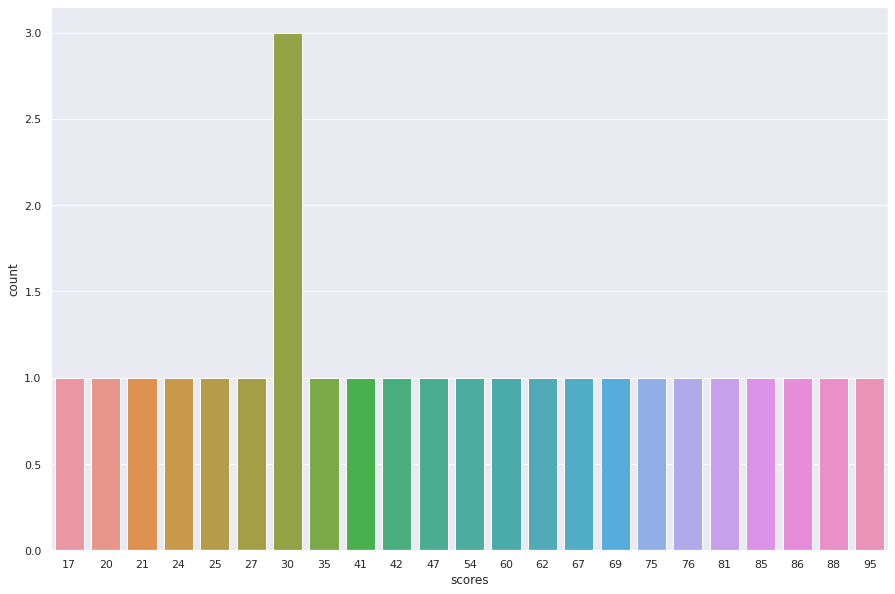

In [8]:
sns.countplot('scores',data=data)
sns.set(rc={'figure.figsize':(15,10)})

In [9]:
succs = data['scores'][data['scores']>=60]
fail  =data['scores'][data['scores']<60]


In [10]:

s_f = [len(succs),len(fail)]

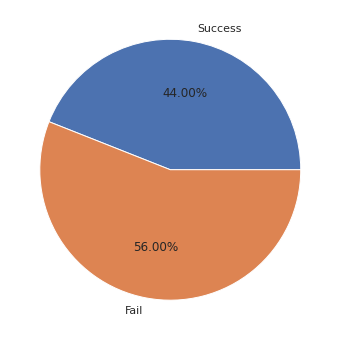

In [11]:
plt.figure(figsize=(8, 6))
plt.pie(s_f,labels =['Success','Fail'], autopct = "%0.2f%%")
plt.show()

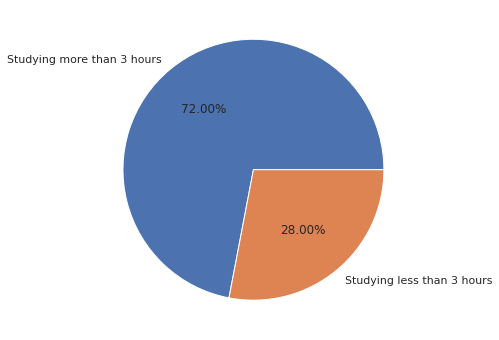

In [12]:
more_than3 = data['hours'][data['hours']>=3]
less_than3  =data['hours'][data['hours']<3]
more_less =[len(more_than3),len(less_than3 )]
plt.figure(figsize=(8, 6))
plt.pie(more_less,labels =['Studying more than 3 hours','Studying less than 3 hours'], autopct = "%0.2f%%")
plt.show()

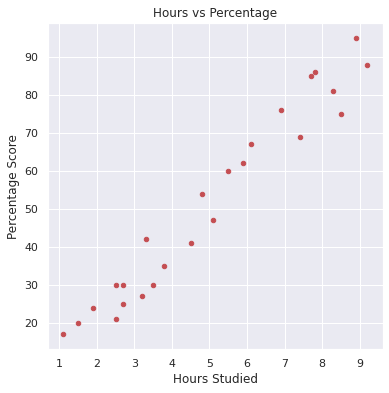

In [13]:
data.plot.scatter('hours','scores',color= 'r',figsize=(6, 6))
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

###Linear Regression from Scratch

Equation of a Straight Line :


$y = m x+ b $ 

$where : $

$x$ is a  random variable ( how far up )

$m$ is the Slop of the line  or Gradient (how steep the line is)

$b$  is the value of $y$  when $x=0$

$y$ is how far long 



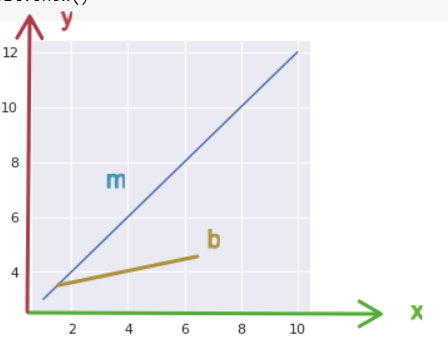

In linear regression we want to find $\theta_0$ and $\theta_1$ in the equation $\hat{y} =\theta_0 + \theta_1 x_1 $

we can find the value of  $\theta_1$ by  $\theta_1 = \frac{\sum_{i=1}^{n} (x_1-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n} (x_1-\bar{x})^2}$

after finding $\theta_1$ we can find $\theta_0$
 by $\theta_0 = \bar{y} - \theta_1 \bar{x}$

In [14]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
x_mean=np.mean(X)
y_mean=np.mean(y)
print("Mean X = " , x_mean)
print("Mean y = " , y_mean)

Mean X =  5.012
Mean y =  51.48


In [15]:
n= len(X) # Total number of values
numerator = 0
denominator = 0 
for i in range(n) :
   numerator+= (X[i] - x_mean) * (y[i]-y_mean)
   denominator += (X[i] - x_mean)**2
   theta_1 = numerator / denominator
   theta_0 = y_mean - (theta_1*x_mean)
print('\u03F4\u2080 = ',theta_0[0],', \u03F4\u2081 = ', theta_1[0])   



ϴ₀ =  2.4836734053731746 , ϴ₁ =  9.775803390787475


**So our equation will be :**  $\hat{y} = 2.4838 + 9.7758 x_1$

In [16]:
max_x = np.max(X) 
min_x = np.min(X) 
# Calculating line values x and y
x = np.linspace(min_x, max_x, 25)
yhat =theta_0 + theta_1 * x
predVsactual= pd.DataFrame({'Actual': y, 'Predicted': yhat})
predVsactual.head()

Actual  Predicted
0      21  13.237057
1      47  16.536391
2      27  19.835724
3      75  23.135058
4      30  26.434392

In [17]:
# # Mean Squared Error
MSE = np.square(np.subtract(y,yhat)).mean()
MSE

950.2396465793827

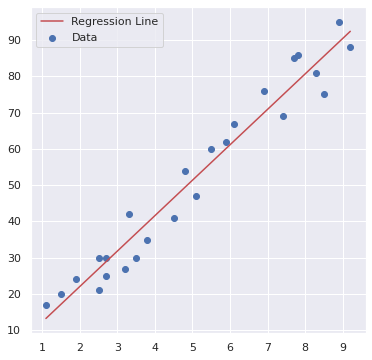

In [18]:

# Ploting Line
plt.figure(figsize=(6,6))
plt.plot(x, yhat, color='r', label='Regression Line')
plt.scatter(X, y, c='b', label='Data')
plt.legend()
plt.show()

#Linear Regression using sklearn ( small dataset)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3125, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print('\u03F4\u2080 =',regressor.intercept_)
print('\u03F4\u2081 =' ,regressor.coef_[0]) 


ϴ₀ = 2.3708153823418883
ϴ₁ = 9.788566686749045


In [21]:
y_hat = regressor.predict(X_test)

In [22]:
predVsactual= pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})
predVsactual.head()

Actual  Predicted
0      20  17.053665
1      27  33.694229
2      69  74.806209
3      30  26.842232
4      62  60.123359

In [23]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

Mean Absolute Error: 4.419727808027651
Mean Squared Error: 22.965097212700428
Root Mean Squared Error: 4.7921912746363144


<Figure size 504x360 with 0 Axes>

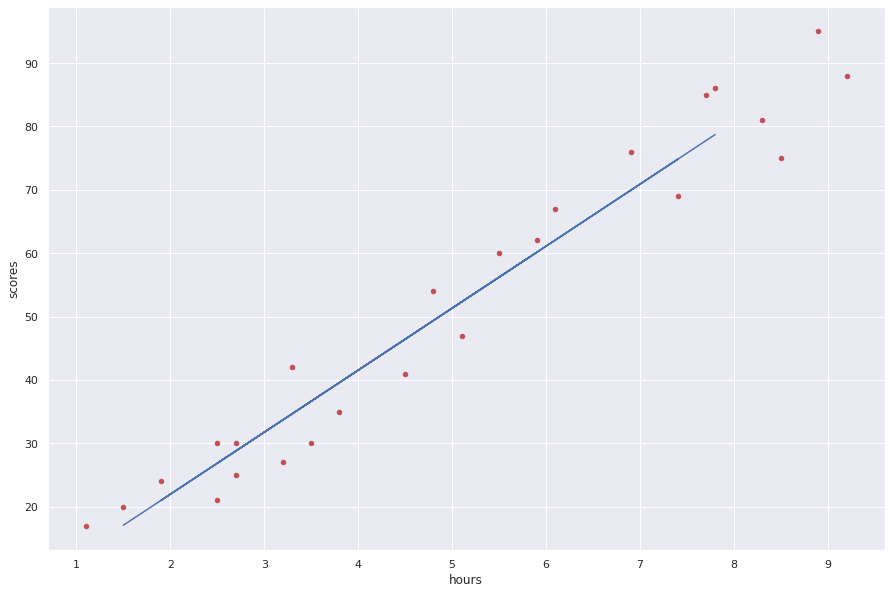

In [24]:
plt.figure(figsize=(7, 5))
data.plot.scatter('hours','scores',color= 'r')
plt.plot(X_test,y_hat)

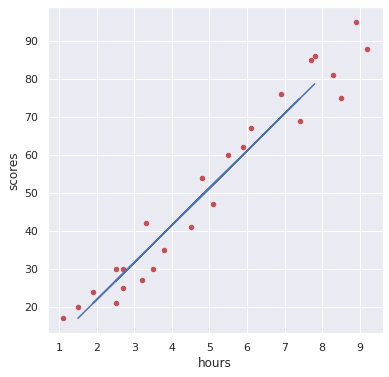

In [25]:
data.plot.scatter('hours','scores',color= 'r',figsize=(6, 6))
plt.plot(X_test,y_hat)

#Multiple Linear Regression 

In [26]:
import io
from google.colab import files
uploaded = files.upload() 
life_exp= pd.read_csv(io.BytesIO(uploaded['Life Expectancy Data.csv']))

Saving Life Expectancy Data.csv to Life Expectancy Data.csv


In [27]:
life_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [28]:
life_exp.head()

Country  Year  ... Income composition of resources  Schooling
0  Afghanistan  2015  ...                           0.479       10.1
1  Afghanistan  2014  ...                           0.476       10.0
2  Afghanistan  2013  ...                           0.470        9.9
3  Afghanistan  2012  ...                           0.463        9.8
4  Afghanistan  2011  ...                           0.454        9.5

[5 rows x 22 columns]

In [29]:
life_exp.shape

(2938, 22)

In [31]:
for i in life_exp.columns :
  print('Number of unique vlaues in ',i,'column is :' ,life_exp[i].nunique())

Number of unique vlaues in  Country column is : 193
Number of unique vlaues in  Year column is : 16
Number of unique vlaues in  Status column is : 2
Number of unique vlaues in  Life expectancy  column is : 362
Number of unique vlaues in  Adult Mortality column is : 425
Number of unique vlaues in  infant deaths column is : 209
Number of unique vlaues in  Alcohol column is : 1076
Number of unique vlaues in  percentage expenditure column is : 2328
Number of unique vlaues in  Hepatitis B column is : 87
Number of unique vlaues in  Measles  column is : 958
Number of unique vlaues in   BMI  column is : 608
Number of unique vlaues in  under-five deaths  column is : 252
Number of unique vlaues in  Polio column is : 73
Number of unique vlaues in  Total expenditure column is : 818
Number of unique vlaues in  Diphtheria  column is : 81
Number of unique vlaues in   HIV/AIDS column is : 200
Number of unique vlaues in  GDP column is : 2490
Number of unique vlaues in  Population column is : 2278
Numbe

In [32]:
life_exp['Year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000])

In [33]:
life_exp['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [34]:
for i in life_exp.columns :
  if life_exp[i].isnull().sum() > 0 :
    print(i ,life_exp[i].isnull().sum(),sep=' : ')


Life expectancy  : 10
Adult Mortality : 10
Alcohol : 194
Hepatitis B : 553
 BMI  : 34
Polio : 19
Total expenditure : 226
Diphtheria  : 19
GDP : 448
Population : 652
 thinness  1-19 years : 34
 thinness 5-9 years : 34
Income composition of resources : 167
Schooling : 163


In [40]:
life_exp= life_exp.dropna()
life_exp= life_exp.reset_index(drop=True)

In [41]:
life_exp.shape

(1649, 22)

In [42]:
life_exp.describe().T

count  ...           max
Year                             1649.0  ...  2.015000e+03
Life expectancy                  1649.0  ...  8.900000e+01
Adult Mortality                  1649.0  ...  7.230000e+02
infant deaths                    1649.0  ...  1.600000e+03
Alcohol                          1649.0  ...  1.787000e+01
percentage expenditure           1649.0  ...  1.896135e+04
Hepatitis B                      1649.0  ...  9.900000e+01
Measles                          1649.0  ...  1.314410e+05
 BMI                             1649.0  ...  7.710000e+01
under-five deaths                1649.0  ...  2.100000e+03
Polio                            1649.0  ...  9.900000e+01
Total expenditure                1649.0  ...  1.439000e+01
Diphtheria                       1649.0  ...  9.900000e+01
 HIV/AIDS                        1649.0  ...  5.060000e+01
GDP                              1649.0  ...  1.191727e+05
Population                       1649.0  ...  1.293859e+09
 thinness  1-19 years            1649.0  ...  2.720000e+01
 thinness 5-9 years              1649.0  ...  2.820000e+01
Income composition of resources  1649.0  ...  9.360000e-01
Schooling                        1649.0  ...  2.070000e+01

[20 rows x 8 columns]

In [37]:
life_exp.corr()

Year  ...  Schooling
Year                             1.000000  ...   0.088732
Life expectancy                  0.050771  ...   0.727630
Adult Mortality                 -0.037092  ...  -0.421171
infant deaths                    0.008029  ...  -0.214372
Alcohol                         -0.113365  ...   0.616975
percentage expenditure           0.069553  ...   0.422088
Hepatitis B                      0.114897  ...   0.215182
Measles                         -0.053822  ...  -0.115660
 BMI                             0.005739  ...   0.554844
under-five deaths                0.010479  ...  -0.226013
Polio                           -0.016699  ...   0.350147
Total expenditure                0.059493  ...   0.243783
Diphtheria                       0.029641  ...   0.350398
 HIV/AIDS                       -0.123405  ...  -0.211840
GDP                              0.096421  ...   0.467947
Population                       0.012567  ...  -0.040312
 thinness  1-19 years            0.019757  ...  -0.491199
 thinness 5-9 years              0.014122  ...  -0.472482
Income composition of resources  0.122892  ...   0.784741
Schooling                        0.088732  ...   1.000000

[20 rows x 20 columns]

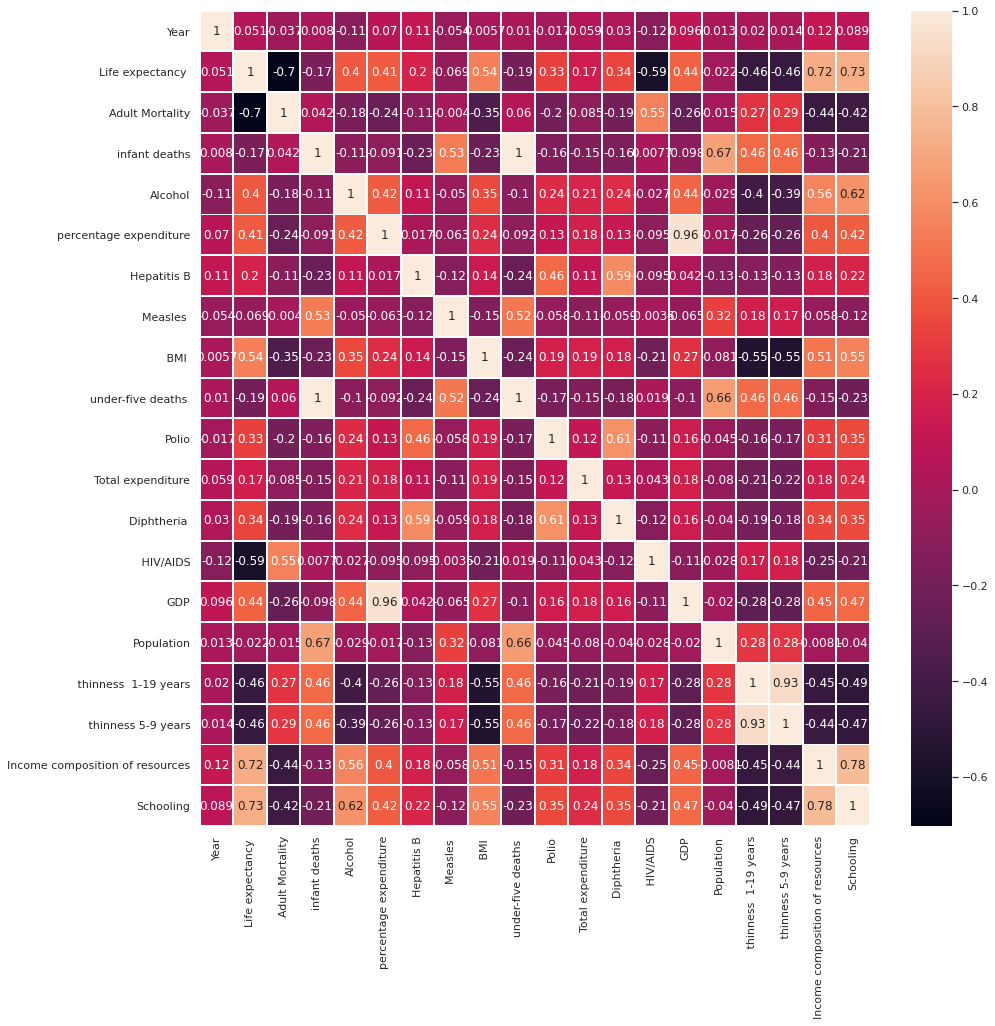

In [38]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(life_exp.corr(),annot=True, linewidths=0.9)

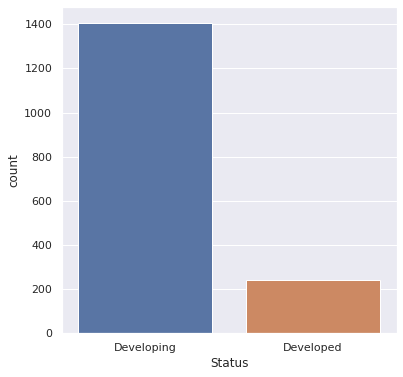

In [108]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(x='Status',data=life_exp)

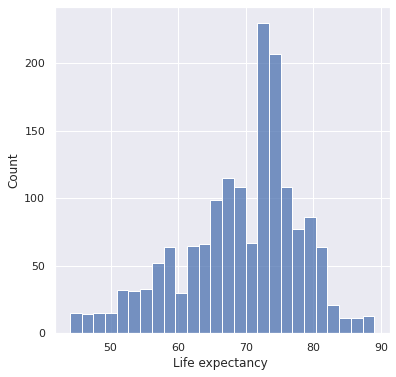

In [114]:
sns.set(rc={'figure.figsize':(6,6)})
sns.histplot(x='Life expectancy ',data=life_exp)

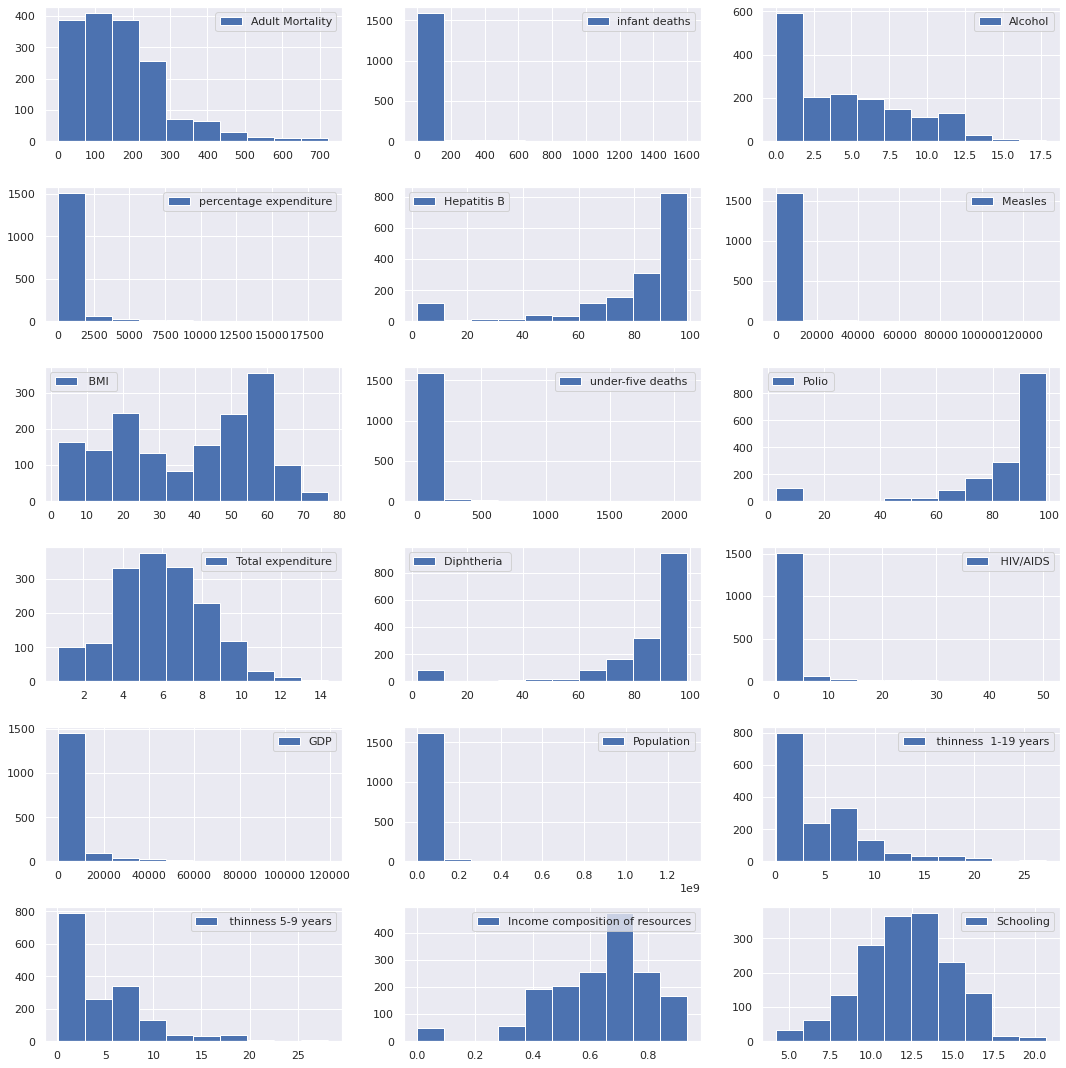

In [138]:

list= life_exp.columns[4:]
fig, axes = plt.subplots(6,3,figsize = (15,15))
 
axe = [sub for x in axes for sub in x]

for i, (c, ax) in enumerate(zip(list, axes.flatten())):
    
       life_exp[c].hist(ax = axe[i],legend= True)
            
fig.tight_layout() 

In [62]:
country_exp_life= life_exp.groupby('Country').mean()['Life expectancy ']
country_exp_life.head()

Country
Afghanistan    58.193750
Albania        75.156250
Algeria        74.209091
Angola         50.675000
Argentina      75.238462
Name: Life expectancy , dtype: float64

Text(0, 0.5, 'Life Expectancy Mean')

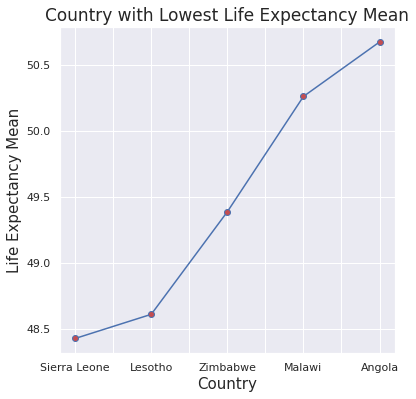

In [89]:

cel=country_exp_life.sort_values()
lowest5= cel[:5].plot(marker='o',markerfacecolor='r',figsize=(6, 6))
plt.title("Country with Lowest Life Expectancy Mean",fontsize = 17)
plt.xlabel('Country',fontsize = 15)
plt.ylabel('Life Expectancy Mean',fontsize = 15)


Text(0, 0.5, 'Life Expectancy Mean')

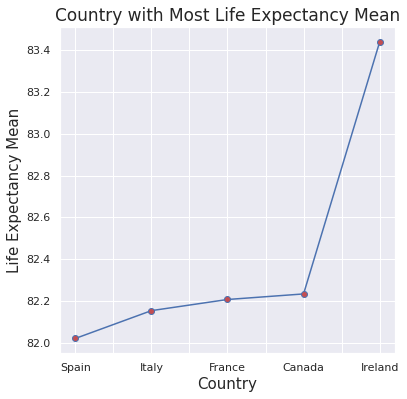

In [90]:
top5= cel[-5:].plot(marker='o',markerfacecolor='r',figsize=(6, 6))
plt.title("Country with Most Life Expectancy Mean",fontsize = 17)
plt.xlabel('Country',fontsize = 15)
plt.ylabel('Life Expectancy Mean',fontsize = 15)

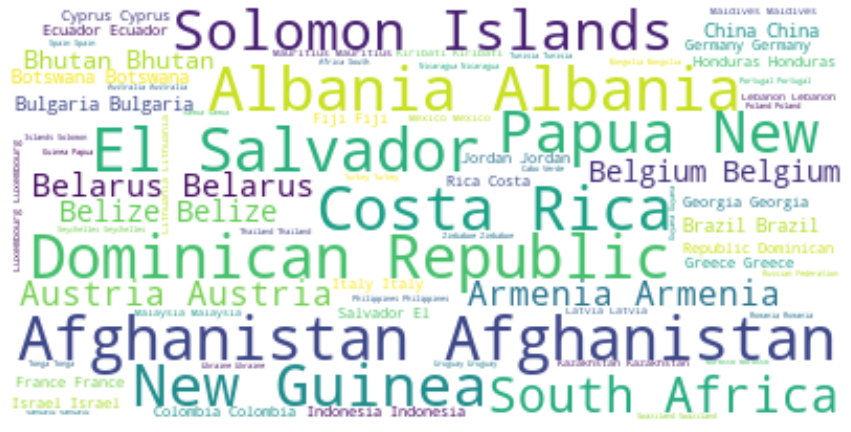

In [130]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(" ".join(life_exp['Country']))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [94]:
year_exp_life= life_exp.groupby('Year').mean()['Life expectancy ']
year_exp_life.head()

Year
2000    70.200000
2001    70.257576
2002    68.583951
2003    68.344211
2004    68.433981
Name: Life expectancy , dtype: float64

Text(0, 0.5, 'Life Expectancy Mean')

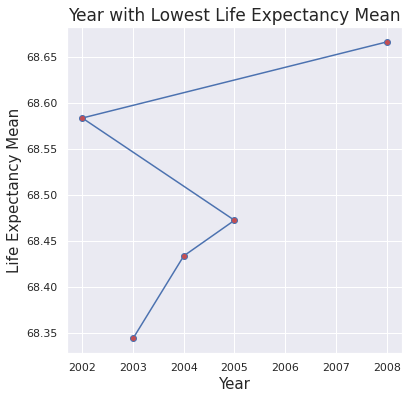

In [98]:
yel=year_exp_life.sort_values()
lowest5= yel[:5].plot(marker='o',markerfacecolor='r',figsize=(6, 6))
plt.title("Year with Lowest Life Expectancy Mean",fontsize = 17)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Life Expectancy Mean',fontsize = 15)

Text(0, 0.5, 'Life Expectancy Mean')

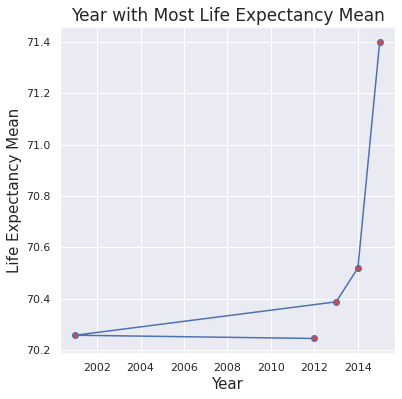

In [104]:
top5= yel[-5:].plot(marker='o',markerfacecolor='r',figsize=(6, 6))
plt.title("Year with Most Life Expectancy Mean",fontsize = 17)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Life Expectancy Mean',fontsize = 15)

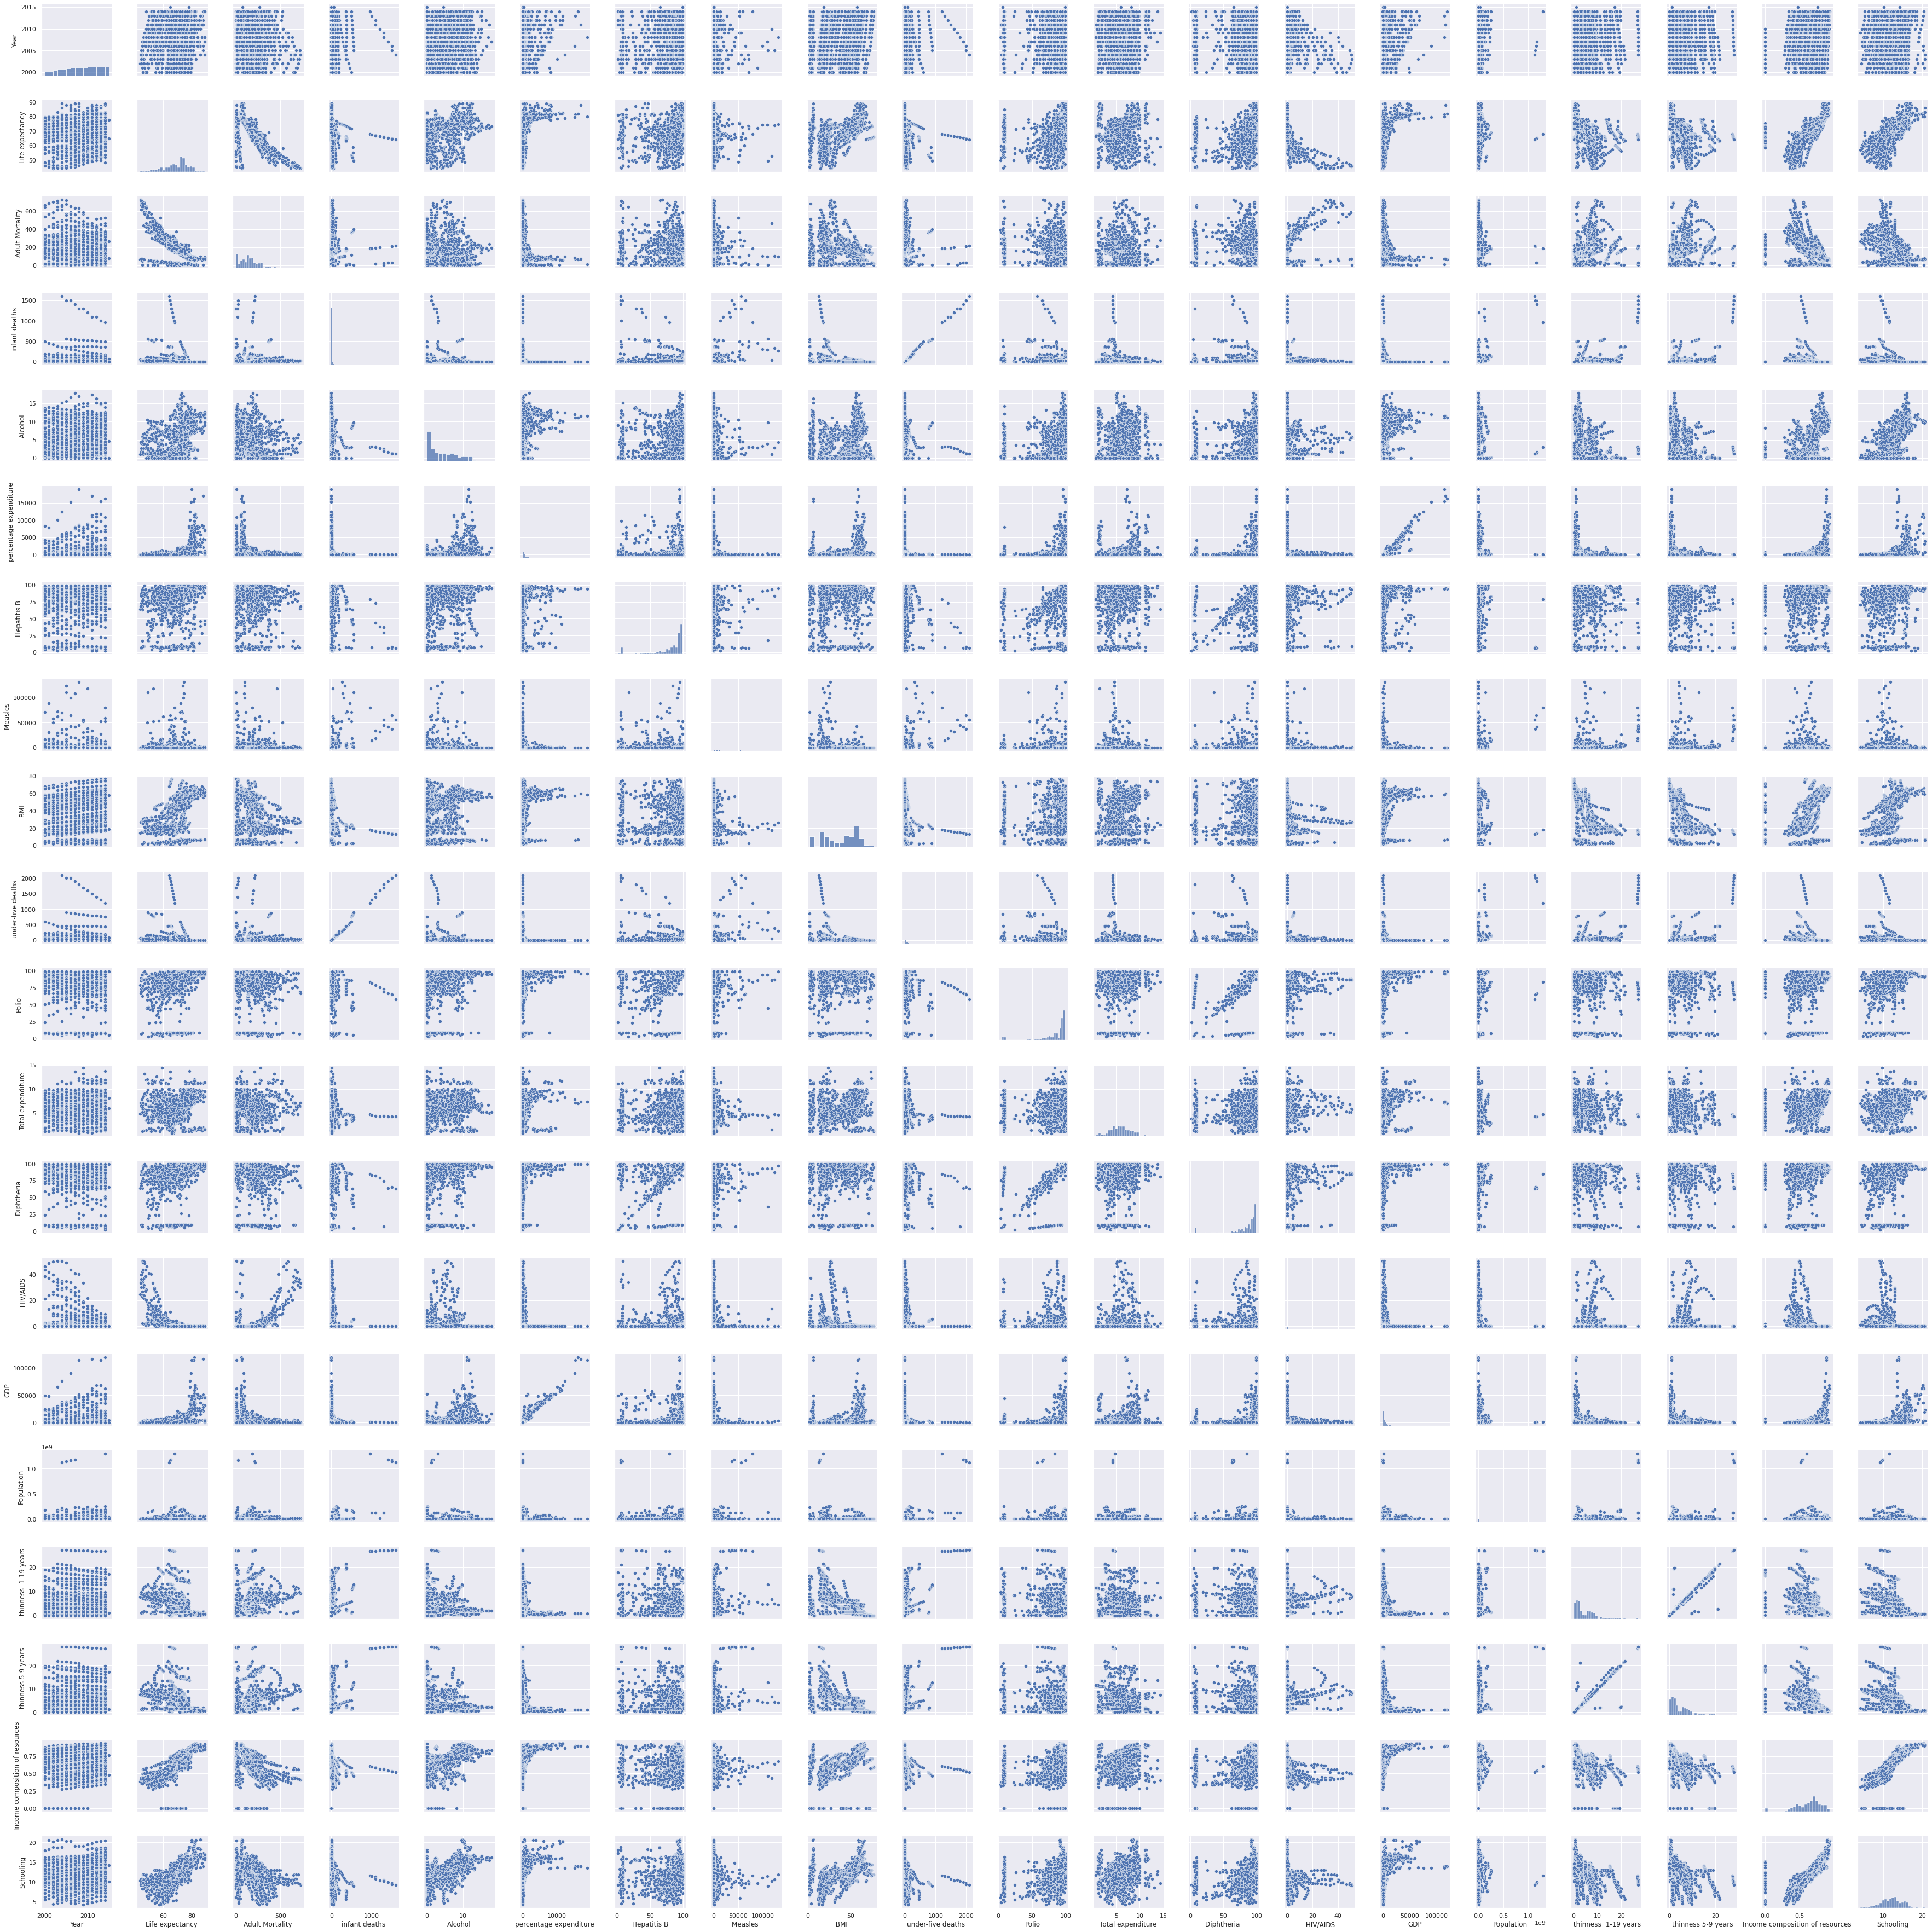

In [106]:
sns.pairplot(data=life_exp)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [173]:
Linear_reg= LinearRegression()
Linear_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [174]:
y_pred=Linear_reg.predict(X_test)
y_pred[:10]


array([27.01878177, 78.84466226, 39.97525189, 75.85470762, 56.91832821,
       49.94176737, 33.99534261, 86.81787465])

In [175]:
pred_and_actual= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_and_actual.head()

Actual  Predicted
0      30  27.018782
1      85  78.844662
2      35  39.975252
3      69  75.854708
4      60  56.918328

In [176]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.864954643694258
Mean Squared Error: 41.63486564552886
Root Mean Squared Error: 6.452508476982333
